# 🤖 Deteksi Akun Bot Kaggle - EDA 📊

## 📝 Penejelasan Dataset
Dataset ini mensimulasikan perilaku pengguna Kaggle untuk mendeteksi akun bot. Meskipun bukan data dunia nyata (dibuat menggunakan library Faker), dataset ini membahas masalah penting tentang manipulasi voting bot dalam kompetisi data science.

### 🎯 Fitur dalam Dataset:
- 👤 **Informasi Pengguna**:
  - `NAME`: Nama pengguna
  - `GENDER`: Jenis kelamin (Pria/Wanita)
  - `EMAIL_ID`: Email pengguna
  - `IS_GLOGIN`: Status login Google (Ya/Tidak)

- 📊 **Metrik Keterlibatan**:
  - `FOLLOWER_COUNT`: Jumlah pengikut
  - `FOLLOWING_COUNT`: Jumlah yang diikuti
  - `DATASET_COUNT`: Dataset yang dibuat
  - `CODE_COUNT`: Notebook yang dibuat
  - `DISCUSSION_COUNT`: Partisipasi diskusi

- ⏱️ **Metrik Aktivitas**:
  - `AVG_NB_READ_TIME_MIN`: Rata-rata waktu membaca notebook
  - `TOTAL_VOTES_GAVE_NB`: Jumlah vote pada notebook
  - `TOTAL_VOTES_GAVE_DS`: Jumlah vote pada dataset
  - `TOTAL_VOTES_GAVE_DC`: Jumlah vote pada diskusi

- 🌍 **Info Registrasi**:
  - `REGISTRATION_IPV4`: IP registrasi
  - `REGISTRATION_LOCATION`: Lokasi registrasi

- 🎯 **Variabel Target**:
  - `ISBOT`: Status bot (Ya/Tidak)

## 📊 Exploratory Data Analysis (EDA)

### 📦 Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

🔍 **Penjelasan**:
- `numpy` dan `pandas` adalah dua pustaka utama untuk analisis data numerik dan tabular.
- `matplotlib.pyplot` dan `seaborn` digunakan untuk visualisasi data yang informatif dan menarik 🎨.

### 📄 Load Dataset

In [2]:
df = pd.read_csv('./dataset/kaggle_bot_accounts.csv')
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


🔍 **Output Penjelasan**:
- `df.head()` menampilkan 5 baris pertama dari dataset.
- Kita bisa lihat beberapa fitur penting seperti `NAME`, `GENDER`, `EMAIL_ID`, `FOLLOWER_COUNT`, hingga label target `ISBOT`.
- Ada beberapa missing values (ditunjukkan dengan `NaN`) seperti pada `AVG_NB_READ_TIME_MIN`, `REGISTRATION_IPV4`, dan `NAME`.

### 📐 Ukuran Dataset

In [3]:
print(df.shape)

(1321188, 17)


🔍 **Penjelasan**:
- Dataset ini sangat besar dengan **1.321.188 baris (entri akun)** dan **17 kolom fitur**. Cocok untuk modeling yang kompleks! 🔥

### 📋 Daftar Kolom

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')


🔍 **Penjelasan**:
- Menampilkan nama-nama kolom (fitur) dalam dataset. Penting untuk navigasi dan seleksi kolom saat pembersihan data dan analisis.

### ℹ️ Informasi Dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1321188 non-null  int64  
 1   NAME                   1243024 non-null  object 
 2   GENDER                 1243309 non-null  object 
 3   EMAIL_ID               1243374 non-null  object 
 4   IS_GLOGIN              1243272 non-null  object 
 5   FOLLOWER_COUNT         1243476 non-null  float64
 6   FOLLOWING_COUNT        1242743 non-null  float64
 7   DATASET_COUNT          1242621 non-null  float64
 8   CODE_COUNT             1243262 non-null  float64
 9   DISCUSSION_COUNT       1243466 non-null  float64
 10  AVG_NB_READ_TIME_MIN   1242872 non-null  float64
 11  REGISTRATION_IPV4      1242859 non-null  object 
 12  REGISTRATION_LOCATION  1242898 non-null  object 
 13  TOTAL_VOTES_GAVE_NB    1243483 non-null  float64
 14  TOTAL_VOTES_GAVE_D

🔍 **Penjelasan**:
- `df.info()` menunjukkan:
  - Tipe data tiap kolom (int, float, object).
  - Jumlah non-null (nilai yang tidak kosong).
  - Kita bisa tahu kolom mana yang memiliki **missing values**.
  - Contoh: `NAME` hanya memiliki 1.243.024 dari 1.321.188 entri, artinya ada ~78.000 akun tanpa nama 🕵️.


### 📊 Statistik Deskriptif

In [6]:
df.describe()

,Unnamed: 0,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,1.321188e+06,1.243476e+06,1.242743e+06,1.242621e+06,1.243262e+06,1.243466e+06,1.242872e+06,1.243483e+06,1.243254e+06,1.243158e+06
mean,6.605935e+05,2.698273e+01,4.505091e+01,2.562564e+00,1.038450e+01,6.584244e+01,1.274225e+01,1.750656e+01,6.501007e+00,1.500373e+00
std,3.813943e+05,2.300504e+01,3.947716e+01,2.499882e+00,8.248055e+00,4.754315e+01,9.564920e+00,4.611783e+00,2.290951e+00,1.118067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
25%,3.302968e+05,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,1.870000e+00,1.400000e+01,5.000000e+00,1.000000e+00
50%,6.605935e+05,2.400000e+01,3.900000e+01,2.000000e+00,1.000000e+01,6.500000e+01,1.229000e+01,1.800000e+01,7.000000e+00,2.000000e+00
75%,9.908902e+05,4.700000e+01,8.000000e+01,5.000000e+00,1.800000e+01,1.080000e+02,2.119000e+01,2.200000e+01,9.000000e+00,3.000000e+00
max,1.321187e+06,7.000000e+01,1.200000e+02,7.000000e+00,2.500000e+01,1.500000e+02,2.999000e+01,2.500000e+01,1.000000e+01,3.000000e+00


🔍 **Penjelasan Insight**:
- `FOLLOWER_COUNT` memiliki rata-rata sekitar 27 dan maksimal 70 — bisa jadi indikator aktif/tidaknya akun.
- `CODE_COUNT` dan `DATASET_COUNT` memperlihatkan kontribusi user terhadap platform Kaggle.
- Distribusi jumlah vote (`TOTAL_VOTES_GAVE_*`) bisa memberi insight perilaku sosial akun.


### 🔢 Jumlah Nilai Unik per Kolom (`df.nunique()`)

In [7]:
df.nunique()

Unnamed: 0               1321188
NAME                     1199433
GENDER                         2
EMAIL_ID                  603013
IS_GLOGIN                      2
FOLLOWER_COUNT                71
FOLLOWING_COUNT              121
DATASET_COUNT                  8
CODE_COUNT                    25
DISCUSSION_COUNT             140
AVG_NB_READ_TIME_MIN        2548
REGISTRATION_IPV4        1242579
REGISTRATION_LOCATION        243
TOTAL_VOTES_GAVE_NB           16
TOTAL_VOTES_GAVE_DS            8
TOTAL_VOTES_GAVE_DC            4
ISBOT                          2
dtype: int64

🔹 Kolom seperti `GENDER`, `IS_GLOGIN`, dan `ISBOT` bersifat kategorikal biner.  
🔹 `Unnamed: 0` kemungkinan adalah index yang tidak diperlukan dan dapat di-drop.  
🔹 Kolom seperti `NAME`, `EMAIL_ID`, dan `REGISTRATION_IPV4` memiliki nilai unik yang sangat tinggi.

### ❓ Jumlah Missing Values (`df.isnull().sum()`)

In [8]:
df.isnull().sum()

Unnamed: 0                   0
NAME                     78164
GENDER                   77879
EMAIL_ID                 77814
IS_GLOGIN                77916
FOLLOWER_COUNT           77712
FOLLOWING_COUNT          78445
DATASET_COUNT            78567
CODE_COUNT               77926
DISCUSSION_COUNT         77722
AVG_NB_READ_TIME_MIN     78316
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION    78290
TOTAL_VOTES_GAVE_NB      77705
TOTAL_VOTES_GAVE_DS      77934
TOTAL_VOTES_GAVE_DC      78030
ISBOT                    78500
dtype: int64

⚠️ Terlihat bahwa hampir semua kolom memiliki jumlah missing value yang signifikan (sekitar 5.9% dari total data).  
Penanganan missing value akan penting untuk menjaga kualitas analisis dan modeling.

### 🔁 Jumlah Duplikasi Data (`df.duplicated().sum()`)

In [9]:
df.duplicated().sum()

0

✅ Tidak ada data duplikat dalam dataset, sehingga tidak perlu dilakukan deduplikasi.

### 📊 Distribusi Data Numerik

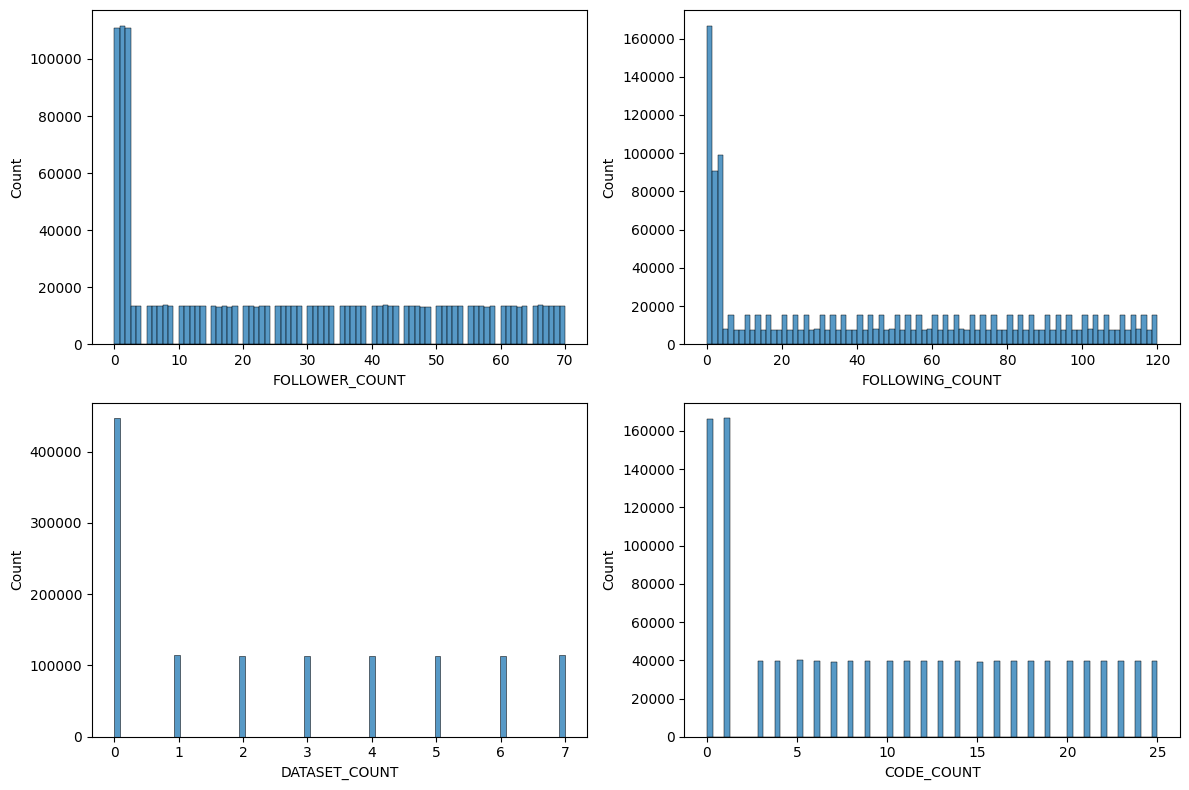

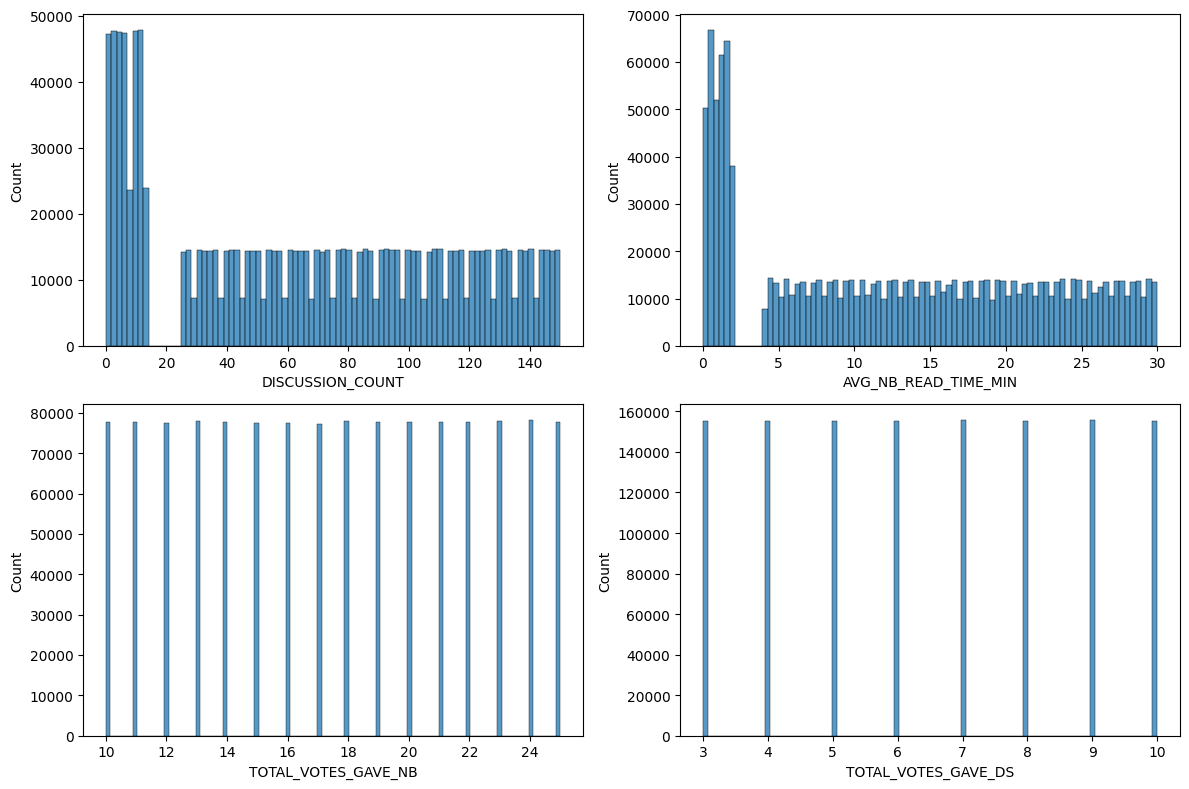

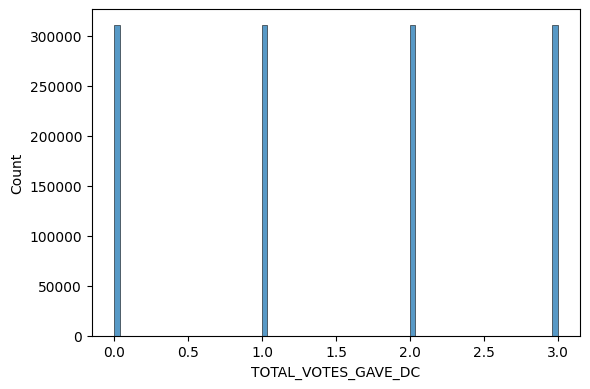

In [10]:
# Distribusi data numerik

# Plot 1: FOLLOWER_COUNT, FOLLOWING_COUNT, DATASET_COUNT, CODE_COUNT
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='FOLLOWER_COUNT', ax=axes[0, 0])
sns.histplot(data=df, x='FOLLOWING_COUNT', ax=axes[0, 1])
sns.histplot(data=df, x='DATASET_COUNT', ax=axes[1, 0])
sns.histplot(data=df, x='CODE_COUNT', ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Plot 2: DISCUSSION_COUNT, AVG_NB_READ_TIME_MIN, TOTAL_VOTES_GAVE_NB, TOTAL_VOTES_GAVE_DS
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='DISCUSSION_COUNT', ax=axes[0, 0])
sns.histplot(data=df, x='AVG_NB_READ_TIME_MIN', ax=axes[0, 1])
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_NB', ax=axes[1, 0])
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_DS', ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Plot 3: TOTAL_VOTES_GAVE_DC
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_DC', ax=ax)
plt.tight_layout()
plt.show()

- **`FOLLOWER_COUNT` & `FOLLOWING_COUNT`** menunjukkan pola distribusi yang sangat *right-skewed* di mana mayoritas pengguna memiliki jumlah yang sangat rendah (umumnya 0).
- **`DATASET_COUNT`** dan **`CODE_COUNT`** juga menunjukkan dominasi angka nol, mengindikasikan bahwa sebagian besar pengguna belum berkontribusi dalam bentuk dataset atau kode.
- **`DISCUSSION_COUNT`** memiliki distribusi yang cukup tersebar, meskipun tetap didominasi oleh angka rendah.
- **`AVG_NB_READ_TIME_MIN`** memperlihatkan sebagian besar pengguna membaca dalam waktu yang sangat singkat, kurang dari 5 menit.
- **`TOTAL_VOTES_GAVE_NB`** dan **`TOTAL_VOTES_GAVE_DS`** terlihat lebih merata namun tetap terbatas pada rentang nilai tertentu, kemungkinan merupakan hasil dari pembulatan atau binning.
- Distribusi **`TOTAL_VOTES_GAVE_DC`** sangat terbatas, hanya berada pada nilai 0 hingga 3. Hal ini menunjukkan bahwa aktivitas voting pada diskusi relatif sangat rendah.

### 🔥 Heatmap Korelasi antar Variabel Numerik

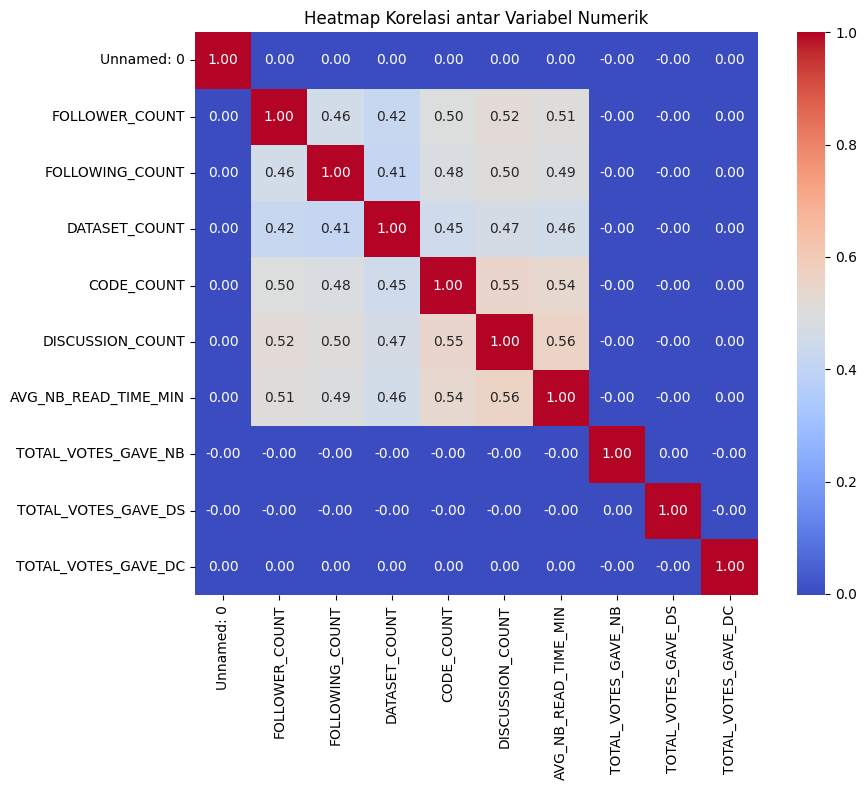

In [11]:
# Heatmap korelasi
# Ambil hanya kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar kolom numerik
corr_matrix = numerik_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()

- 🔗 **Korelasi sedang antar fitur aktivitas**:
  - `FOLLOWER_COUNT`, `FOLLOWING_COUNT`, `DATASET_COUNT`, `CODE_COUNT`, dan `DISCUSSION_COUNT` memiliki korelasi **positif sedang** (sekitar 0.4–0.5) satu sama lain.
  - Hal ini menunjukkan bahwa pengguna yang aktif dalam satu aspek (misalnya membuat kode) cenderung aktif juga dalam aspek lain seperti berdiskusi atau memiliki banyak pengikut.

- ⏱️ **`AVG_NB_READ_TIME_MIN`** berkorelasi positif dengan fitur-fitur aktivitas seperti `DISCUSSION_COUNT` (0.56) dan `CODE_COUNT` (0.54), menandakan bahwa pengguna yang lebih aktif juga menghabiskan waktu lebih lama membaca notebook.

- ❌ **`TOTAL_VOTES_GAVE_*`** memiliki korelasi **nol** terhadap fitur lainnya.
  - Artinya, aktivitas voting pengguna (terhadap notebook, dataset, dan diskusi) tidak berkaitan langsung dengan metrik lain dalam dataset. Kemungkinan besar karena aktivitas voting sangat jarang dilakukan, seperti yang juga terlihat pada distribusi sebelumnya.

- 📛 **Kolom `Unnamed: 0`** tidak memiliki korelasi berarti dan dapat diabaikan karena kemungkinan besar merupakan indeks hasil dari proses ekspor dataset.

### 📦 Analisis Outlier dengan Box Plot dan IQR


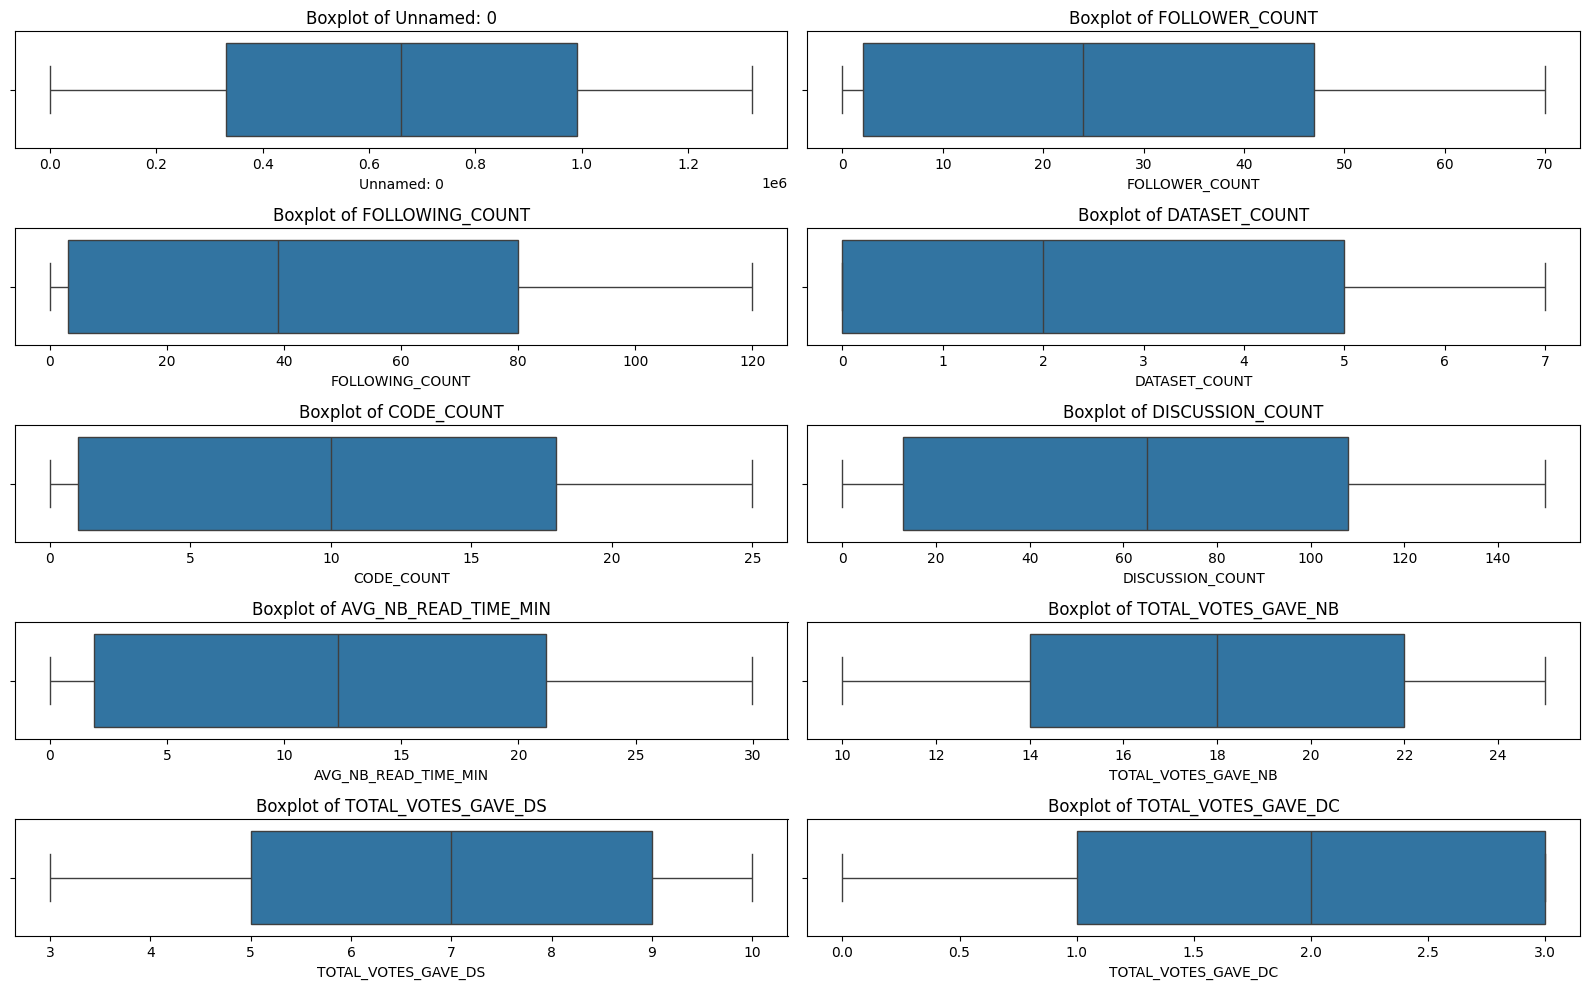

In [12]:
# Box plot untuk deteksi outlier

# Ambil hanya kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplot untuk semua kolom numerik
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerik_cols):
    plt.subplot((len(numerik_cols)+1)//2, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [13]:
outlier_summary = {}

for col in numerik_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Jumlah Outlier': outliers.shape[0],
        'Persentase Outlier': (outliers.shape[0] / df.shape[0]) * 100
    }

import pandas as pd
pd.DataFrame(outlier_summary).T.sort_values(by='Persentase Outlier', ascending=False)


,Jumlah Outlier,Persentase Outlier
Unnamed: 0,0.0,0.0
FOLLOWER_COUNT,0.0,0.0
FOLLOWING_COUNT,0.0,0.0
DATASET_COUNT,0.0,0.0
CODE_COUNT,0.0,0.0
DISCUSSION_COUNT,0.0,0.0
AVG_NB_READ_TIME_MIN,0.0,0.0
TOTAL_VOTES_GAVE_NB,0.0,0.0
TOTAL_VOTES_GAVE_DS,0.0,0.0
TOTAL_VOTES_GAVE_DC,0.0,0.0


 🔍 **Insight**: Tidak ditemukan outlier pada seluruh fitur numerik, baik dari sisi jumlah maupun persentase. Hal ini bisa menunjukkan bahwa:
- Data telah **terstandardisasi** atau dibersihkan sebelumnya.
- Atau memang distribusi datanya tidak memiliki pencilan ekstrem.

### 🧩 Distribusi Fitur Kategorikal

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribusi {col}:")
    dist = df[col].value_counts().to_frame(name='Count')
    dist['Percentage (%)'] = df[col].value_counts(normalize=True) * 100
    print(dist)



Distribusi NAME:
                        Count  Percentage (%)
NAME                                         
David SmithSmith           17        0.001368
Michael JohnsonJohnson     16        0.001287
Michael JohnsonSmith       15        0.001207
John JohnsonJohnson        15        0.001207
Michael WilliamsSmith      15        0.001207
...                       ...             ...
Stephanie JonesBennett      1        0.000080
Joseph MorenoReynolds       1        0.000080
Heidi HammondWall           1        0.000080
John BlairBowman            1        0.000080
Susan WilliamsJimenez       1        0.000080

[1199433 rows x 2 columns]

Distribusi GENDER:
         Count  Percentage (%)
GENDER                        
Male    932220       74.978947
Female  311089       25.021053

Distribusi EMAIL_ID:
                            Count  Percentage (%)
EMAIL_ID                                         
csmith@example.org            117        0.009410
rsmith@example.net            108       

- Beberapa fitur seperti NAME, EMAIL_ID, dan REGISTRATION_IPV4 terlalu unik dan sebaiknya tidak dipakai langsung sebagai fitur dalam modeling.
- GENDER, IS_GLOGIN, ISBOT, dan REGISTRATION_LOCATION memiliki distribusi yang lebih terstruktur dan bermanfaat untuk eksplorasi atau klasifikasi.
- Ketimpangan kelas perlu diperhatikan (seperti pada GENDER atau ISBOT) jika digunakan untuk pelatihan model machine learning.